In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pprint
sns.set(style="white", context='poster')
from sympy import *
import math
init_printing(use_unicode=True)
from scipy.integrate import solve_ivp

In [2]:
1201 + 326 + 685 + 328 + 1195 + 2225

In [3]:
%load_ext autoreload
%autoreload 2


In [4]:
from model_equations_separate_NC_sep_vmax import *

In [5]:
import run_sensitivity

In [6]:

HCOLOR = '#ffc58f'
HCOLOR_light = '#ffd2a9'
PCOLOR = '#99cc99'
PCOLOR_light = '#aad5aa'

DONCOLOR = '#7285b7'
RDONCOLOR = 'black' #'#00334D'
DINCOLOR = '#bbdaff' #'#000066'

DOCCOLOR = '#cc6666'
RDOCCOLOR = 'black' #'#00334D'
DICCOLOR = '#ff9da4' #'#000066'

SHCOLOR = '#ffa98f'
SPCOLOR = '#326232'


ccnpalette = [DONCOLOR, RDONCOLOR, DINCOLOR,SPCOLOR, SHCOLOR,PCOLOR, HCOLOR, ]
ccnorder = ['DON', 'RDON', 'DIN', 'Sp', 'Sh', 'Bp', 'Bh', ]
cccpalette = [ SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR, PCOLOR, HCOLOR,]
cccorder = ['Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC', 'Bp[C]', 'Bh[C]', ]
ccxpalette = [PCOLOR, HCOLOR]
ccxorder = ['Xp', 'Xh']
hnpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
hnorder = [ 'Bh', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
hcpalette = [ HCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
hcorder = [ 'Bh[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
pnpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DONCOLOR, RDONCOLOR, DINCOLOR]
pnorder = [ 'Bp', 'Sp', 'Sh', 'DON', 'RDON', 'DIN']
pcpalette = [ PCOLOR_light, SPCOLOR, SHCOLOR, DOCCOLOR, RDOCCOLOR, DICCOLOR]
pcorder = [ 'Bp[C]', 'Sp[C]', 'Sh[C]', 'DOC', 'RDOC', 'DIC']
sns.color_palette(ccnpalette + cccpalette, )
# 


In [7]:
refdf = pd.read_excel('reference_10cc.xlsx')


In [8]:
#dpath = r'C:\Users\wosnat\OneDrive - University of Haifa\Documents\results\recycle_model\res'
#dpath = r'C:\Users\Osnat\OneDrive - University of Haifa\Documents\results\recycle_model\res\29062023'
dpath = 'results'

In [9]:
import os
os.listdir(dpath)

['het_monte_LEAK_sum.csv.gz',
 'het_monte_MIN_df.csv.gz',
 'het_monte_LEAK_df.csv.gz',
 'het_monte_MIN_mse.csv.gz',
 'het_lsq_MIN_sum.csv.gz',
 'het_lsq_MIN_df.csv.gz',
 'PONLY',
 'het_monte_MIN_sum.csv.gz',
 'het_lsq_MIN_mse.csv.gz',
 'vhet_MIN_mse.csv.gz',
 'toremove',
 'vhet_MIN_df.csv.gz',
 'vhet_MIN_sum.csv.gz',
 'het_monte_LEAK_mse.csv.gz']

In [10]:
lsq_df =  pd.read_csv(os.path.join(dpath,'het_lsq_MIN_df.csv.gz' ))
lsqsum_df = pd.read_csv(os.path.join(dpath,'het_lsq_MIN_sum.csv.gz' ))
lsqmse_df = pd.read_csv(os.path.join(dpath,'het_lsq_MIN_mse.csv.gz' ))

In [11]:
monte1_df =  pd.read_csv(os.path.join(dpath,'het_monte_MIN_df.csv.gz' ))
monte1sum_df = pd.read_csv(os.path.join(dpath,'het_monte_MIN_sum.csv.gz' ))
monte1mse_df = pd.read_csv(os.path.join(dpath,'het_monte_MIN_mse.csv.gz' ))

In [12]:
monte2_df =  pd.read_csv(os.path.join(dpath,'het_monte_LEAK_df.csv.gz' ))
monte2sum_df = pd.read_csv(os.path.join(dpath,'het_monte_LEAK_sum.csv.gz' ))
monte2mse_df = pd.read_csv(os.path.join(dpath,'het_monte_LEAK_mse.csv.gz' ))

In [13]:
vhet1_df =  pd.read_csv(os.path.join(dpath,'vhet_MIN_df.csv.gz' ))
vhet1sum_df = pd.read_csv(os.path.join(dpath,'vhet_MIN_sum.csv.gz' ))
vhet1mse_df = pd.read_csv(os.path.join(dpath,'vhet_MIN_mse.csv.gz' ))

In [14]:
monte1_df['model'] =  'MIN'
monte1mse_df['model'] =  'MIN'
vhet1_df['model'] =  'MIN'
vhet1mse_df['model'] =  'MIN'
monte2_df['model'] =  'LEAK'
monte2mse_df['model'] =  'LEAK'
lsq_df['model'] =  'MIN'
lsqmse_df['model'] =  'MIN'

In [15]:
monte1_df['mode'] =  'Monte'
monte1mse_df['mode'] =  'Monte'
vhet1_df['mode'] =  'VHET'
vhet1mse_df['mode'] =  'VHET'
monte2_df['mode'] =  'Monte'
monte2mse_df['mode'] =  'Monte'
lsq_df['mode'] =  'LSQ'
lsqmse_df['mode'] =  'LSQ'

In [16]:
monte1sum_df.shape, monte2sum_df.shape, vhet1sum_df.shape, lsqsum_df.shape

In [17]:
df = pd.concat([monte1_df, monte2_df, vhet1_df, lsq_df], ignore_index=True)
mse_df = pd.concat([monte1mse_df, monte2mse_df, vhet1mse_df, lsqmse_df], ignore_index=True)


In [18]:
mse_df['model/mode'] = mse_df['model']+ ' / '+mse_df['mode']
df['model/mode'] = df['model']+ ' / '+df['mode']


In [19]:
mdf = df.melt(id_vars=['mode','model', 'model/mode', 'run_id', 'day', 't'], value_vars=['Bp', 'Bh', 'DON', 'RDON', 'DIN', 'DOC', 'RDOC', 'DIC',])

In [20]:
neg_ids = set(mdf.loc[mdf.value<-1e-6, 'run_id'])
#neg_ids
#df = df.loc[~df.run_id.isin(neg_ids)]
#sum_df = sum_df.loc[~sum_df.run_id.isin(neg_ids)]


In [21]:
problematic_mse_ids = set(mse_df.loc[mse_df.compare_points < 74, 'run_id'])

In [22]:
problematic_ids = problematic_mse_ids | neg_ids

In [23]:
len(problematic_ids)

In [24]:
mdf = mdf.loc[~mdf.run_id.isin(problematic_ids)]
df = df.loc[~df.run_id.isin(problematic_ids)]
mse_df = mse_df.loc[~mse_df.run_id.isin(problematic_ids)]


In [25]:
mse_df.compare_points.value_counts()

74.0    1584060
Name: compare_points, dtype: int64

In [26]:
mse_df = mse_df.loc[~mse_df.Group.isin(['Axenic'])]

In [27]:
mse_df.Group.unique()
mse_df.loc[mse_df.Group.isin(['Inhibited Viable']), 'Group'] ='Inhibited'

In [28]:
min_mse_df = mse_df.loc[mse_df.groupby('run_id').MSE.idxmin()].reset_index(drop=True)

In [29]:
min_mse_df.Group.value_counts()

Inhibited    25557
Sustained    22200
Strong        5045
Name: Group, dtype: int64

In [30]:
min_mse_df['mode'].value_counts()

LSQ      41696
Monte    11065
VHET        41
Name: mode, dtype: int64

In [31]:
min_mse_df['model/mode'].value_counts()

MIN / LSQ       41696
MIN / Monte      6007
LEAK / Monte     5058
MIN / VHET         41
Name: model/mode, dtype: int64

In [38]:
min_mse_df[['Group', 'model/mode']].value_counts()

Group      model/mode  
Sustained  MIN / LSQ       19772
Inhibited  MIN / LSQ       17311
Strong     MIN / LSQ        4613
Inhibited  MIN / Monte      4582
           LEAK / Monte     3632
Sustained  MIN / Monte      1407
           LEAK / Monte     1013
Strong     LEAK / Monte      413
Inhibited  MIN / VHET         32
Strong     MIN / Monte        18
Sustained  MIN / VHET          8
Strong     MIN / VHET          1
dtype: int64

In [32]:
min_mse_df['full name'].value_counts()

Pseudoalteromonas haloplanktis    20336
E. coli                           18486
Marinovum 5F3                      5310
Sulfitobacter pseudonitzschiae     4961
A. macleodii 1A3                   1864
Roseovarius 5C3                     971
Phaeobacter gallaeciensis           789
Ruegeria pomeroyi                    84
Marinobacter adhaerens HP15           1
Name: full name, dtype: int64

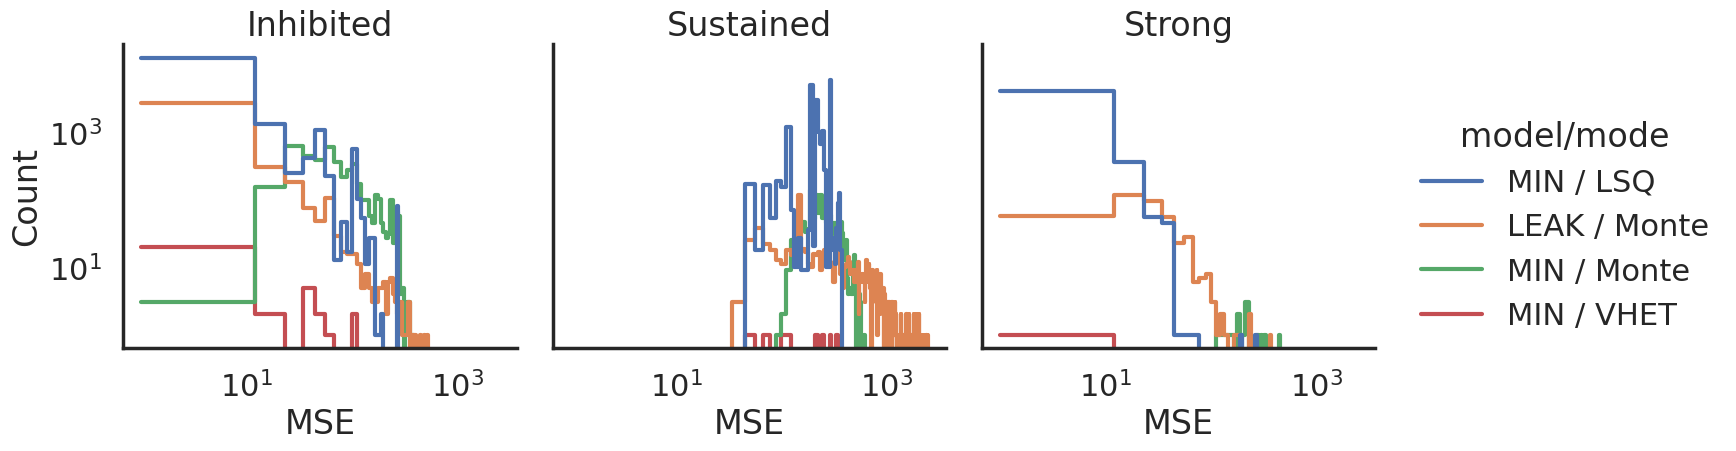

In [33]:
sns.displot(
    data=min_mse_df, x='MSE', hue='model/mode', #multiple='stack', 
    col='Group',
    element="step",fill=False
    
).set_titles(col_template='{col_name}').set(yscale='log', xscale='log')
plt.yscale('log')


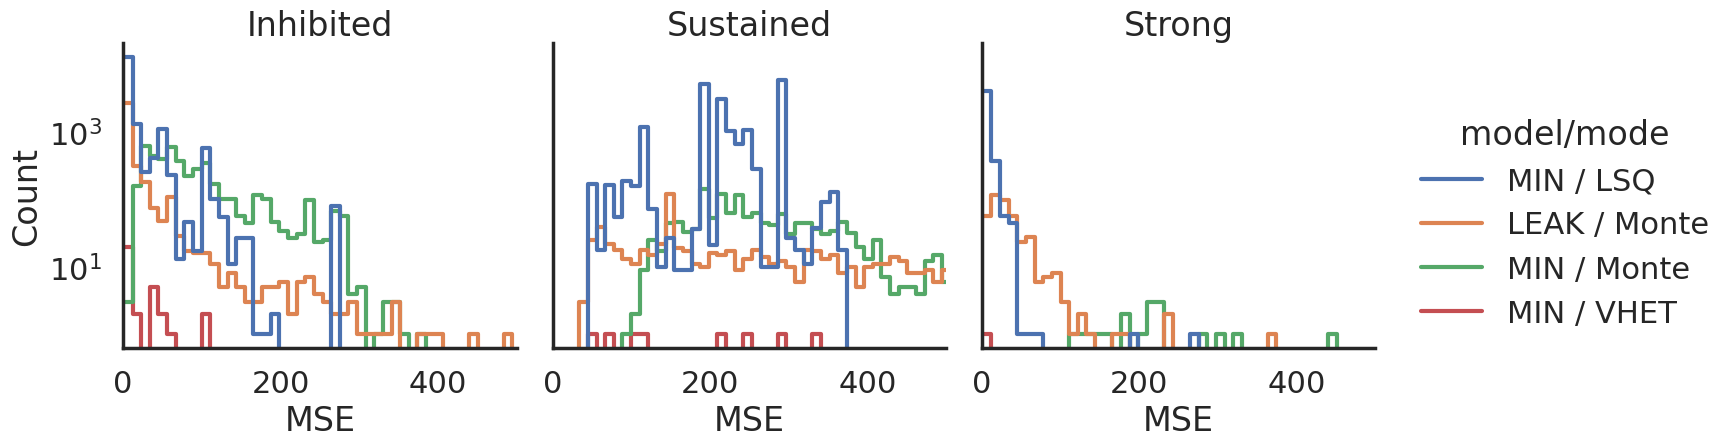

In [34]:
sns.displot(
    data=min_mse_df, x='MSE', hue='model/mode', #multiple='stack', 
    col='Group',
    element="step",fill=False
    
).set_titles(col_template='{col_name}').set(yscale='log', xlim=(0,500)) #xscale='log')
#plt.yscale('log')


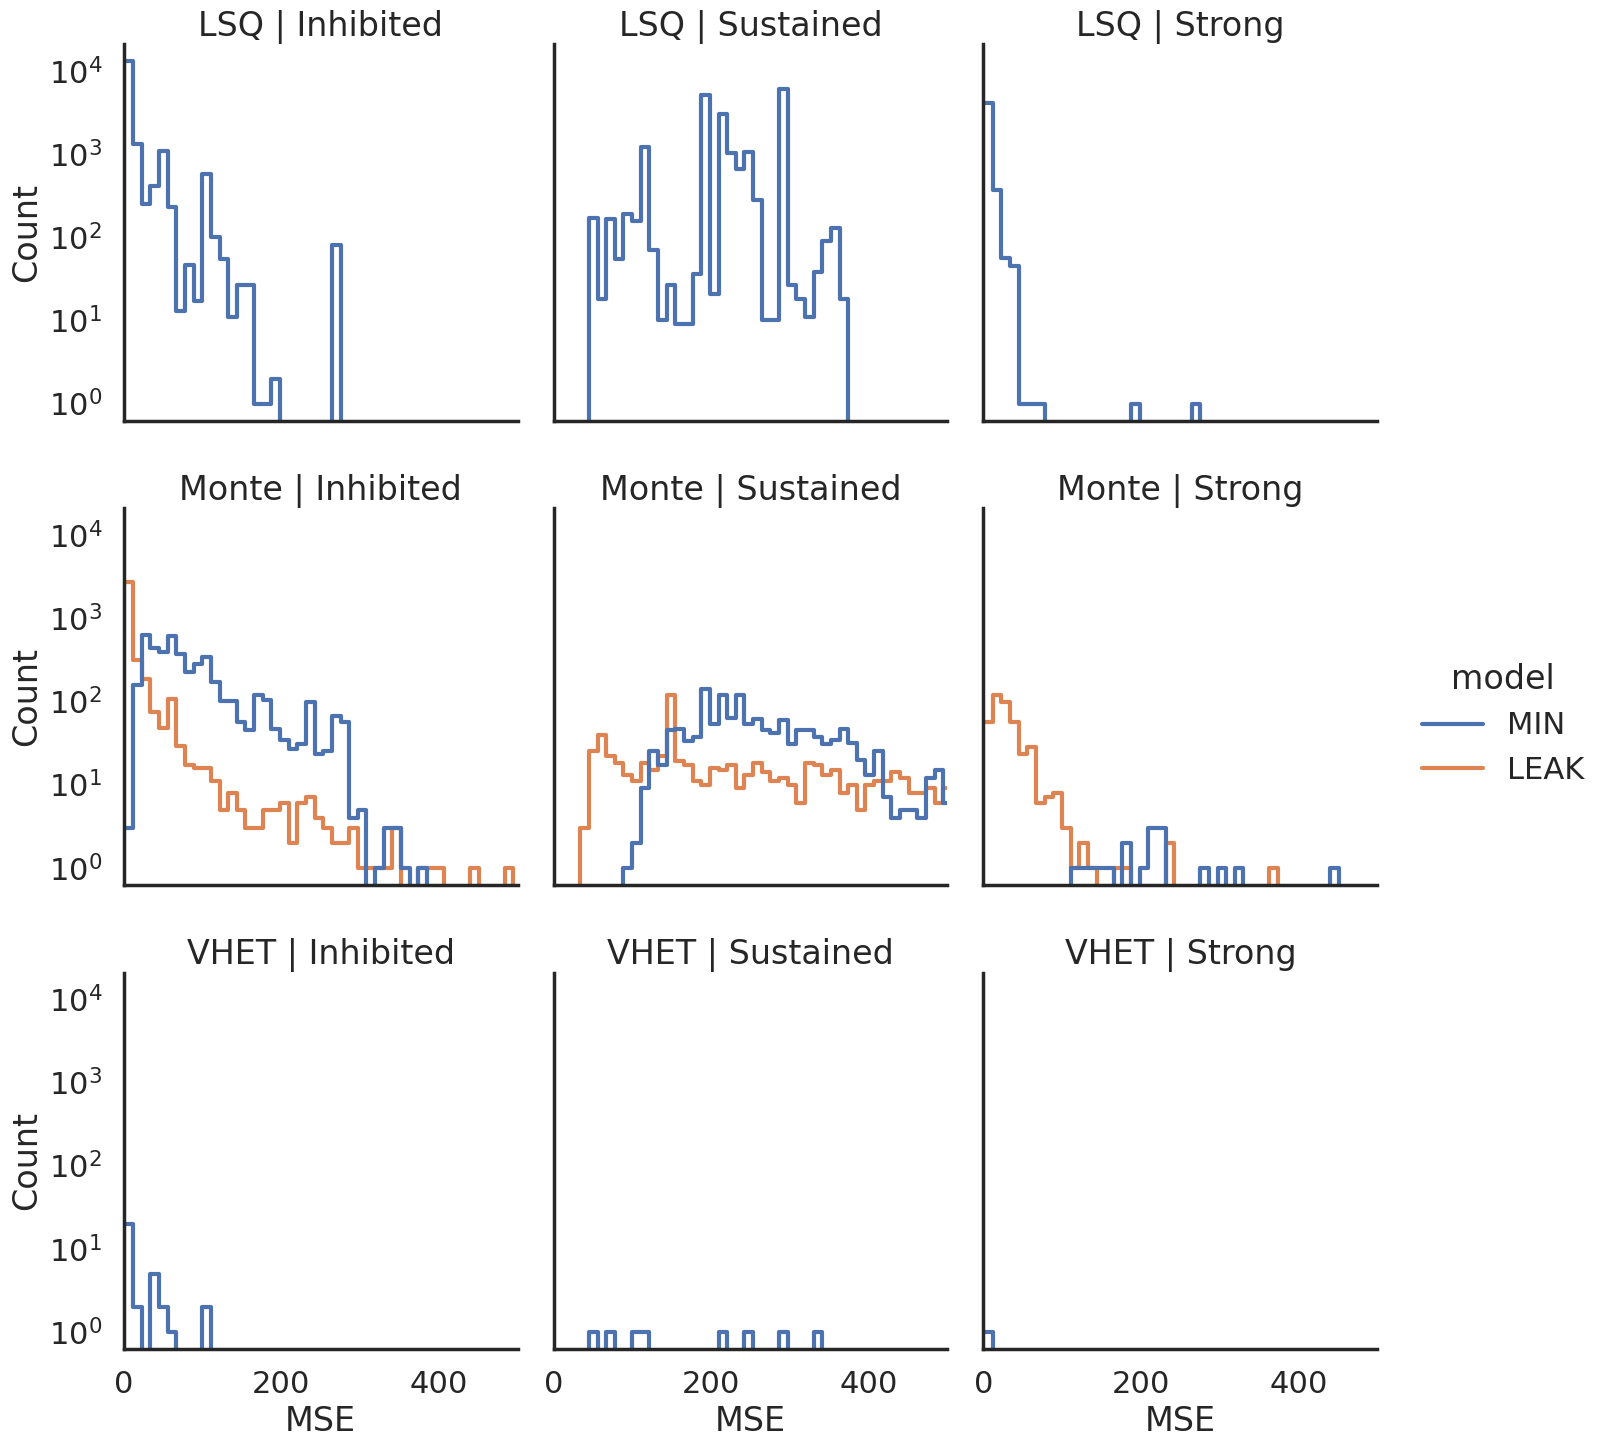

In [40]:
sns.displot(
    data=min_mse_df, x='MSE', hue='model', #multiple='stack', 
    col='Group', row='mode',
    element="step",fill=False
    
).set_titles(col_template='{col_name}', row_template='{row_name}').set(yscale='log', xlim=(0,500)) #xscale='log')
#plt.yscale('log')


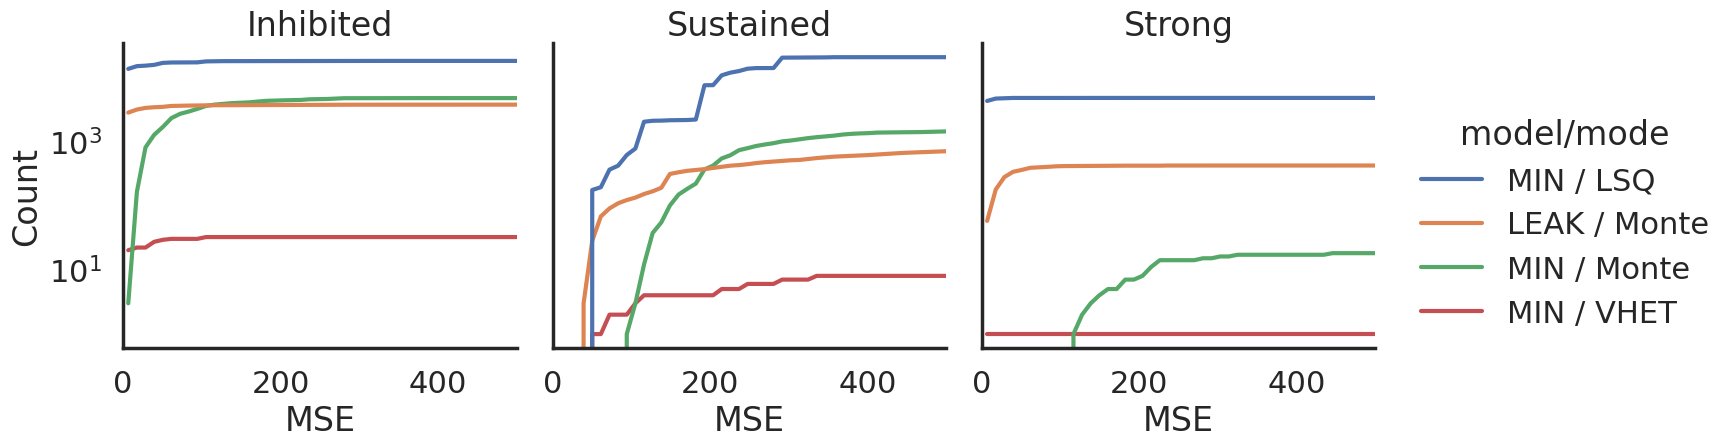

In [35]:
sns.displot(
    data=min_mse_df, x='MSE', hue='model/mode', #multiple='stack', 
    col='Group',
    element="poly",fill=False, cumulative=True, 
    
).set_titles(col_template='{col_name}').set(yscale='log', xlim=(0,500)) #xscale='log')
#plt.yscale('log')


In [36]:
min_mse_df.loc[min_mse_df.Group.isin(['Sustained', 'Strong'])].nsmallest(columns='MSE', n=10)

Sample                       full name   Group  compare_points  \
42024    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
46493    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
45995    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
42384    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
42345    7B0  Sulfitobacter pseudonitzschiae  Strong            74.0   
42496    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
42616    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
42429    7B0  Sulfitobacter pseudonitzschiae  Strong            74.0   
46110    7C0  Sulfitobacter pseudonitzschiae  Strong            74.0   
41952    7B0  Sulfitobacter pseudonitzschiae  Strong            74.0   

            MSE                                             run_id model  \
42024  5.346191  het_monte_LEAK_least_square_LEAK_0.01_379_h-88...  LEAK   
46493  5.661035  het_monte_LEAK_least_square_LEAK_1_765_h667989...  LEAK   
45995  5.870436  het_monte_LEAK_least_square_LEAK_1_314_h155936...  LEAK   
42384  5.943998  het_monte_LEAK_least_square_LEAK_0.01_708_h613...  LEAK   
42345  6.194830  het_monte_LEAK_least_square_LEAK_0.01_673_h194...  LEAK   
42496  6.443299  het_monte_LEAK_least_square_LEAK_0.01_813_h-31...  LEAK   
42616  6.503397  het_monte_LEAK_least_square_LEAK_0.01_927_h-74...  LEAK   
42429  6.600989  het_monte_LEAK_least_square_LEAK_0.01_74_h1731...  LEAK   
46110  6.668102  het_monte_LEAK_least_square_LEAK_1_418_h847665...  LEAK   
41952  6.687603  het_monte_LEAK_least_square_LEAK_0.01_313_h-60...  LEAK   

        mode    model/mode  
42024  Monte  LEAK / Monte  
46493  Monte  LEAK / Monte  
45995  Monte  LEAK / Monte  
42384  Monte  LEAK / Monte  
42345  Monte  LEAK / Monte  
42496  Monte  LEAK / Monte  
42616  Monte  LEAK / Monte  
42429  Monte  LEAK / Monte  
46110  Monte  LEAK / Monte  
41952  Monte  LEAK / Monte

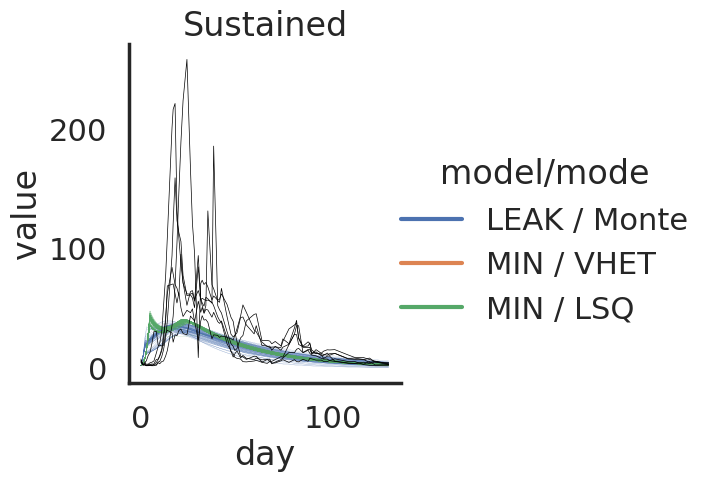

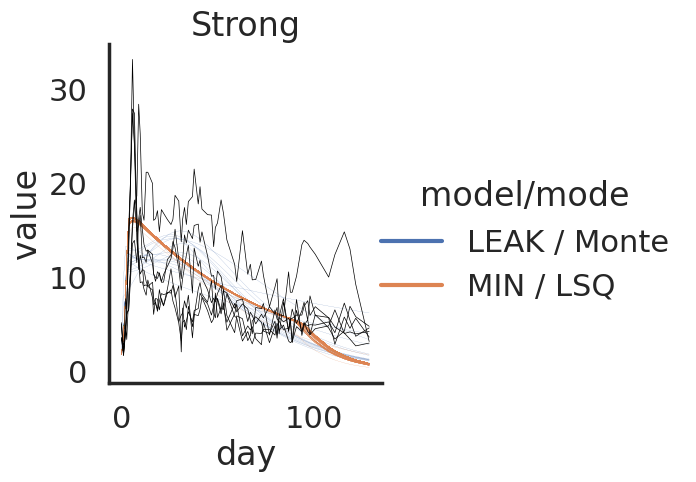

In [100]:
for g in min_mse_df.Group.unique():
    runids = min_mse_df.loc[min_mse_df.Group.isin([g])].nsmallest(500, 'MSE')['run_id']
    sns.relplot(
        data=mdf.loc[mdf.variable.isin(['Bp']) & mdf.run_id.isin(runids)],
        x='day',
        y='value',
        hue='model/mode',
        kind='line', lw=0.1,
        estimator=None, units='run_id',
        #legend=False,
    )
    sns.lineplot(
        data=refdf.loc[refdf.Group.isin([g])], # & refdf.Sample.isin(mse_df.Sample)],
        x='day', y='ref_Bp',
        color='black', lw=0.5, dashes=True,
        estimator=None, units='Sample',
        legend=False,
    )
    
        
    
    #plt.yscale('log')
    plt.title(g)
    plt.show()

In [101]:
lowest_ids = min_mse_df.loc[min_mse_df.Group.isin(['Sustained', 'Strong'])].nsmallest(columns='MSE', n=10)['run_id']

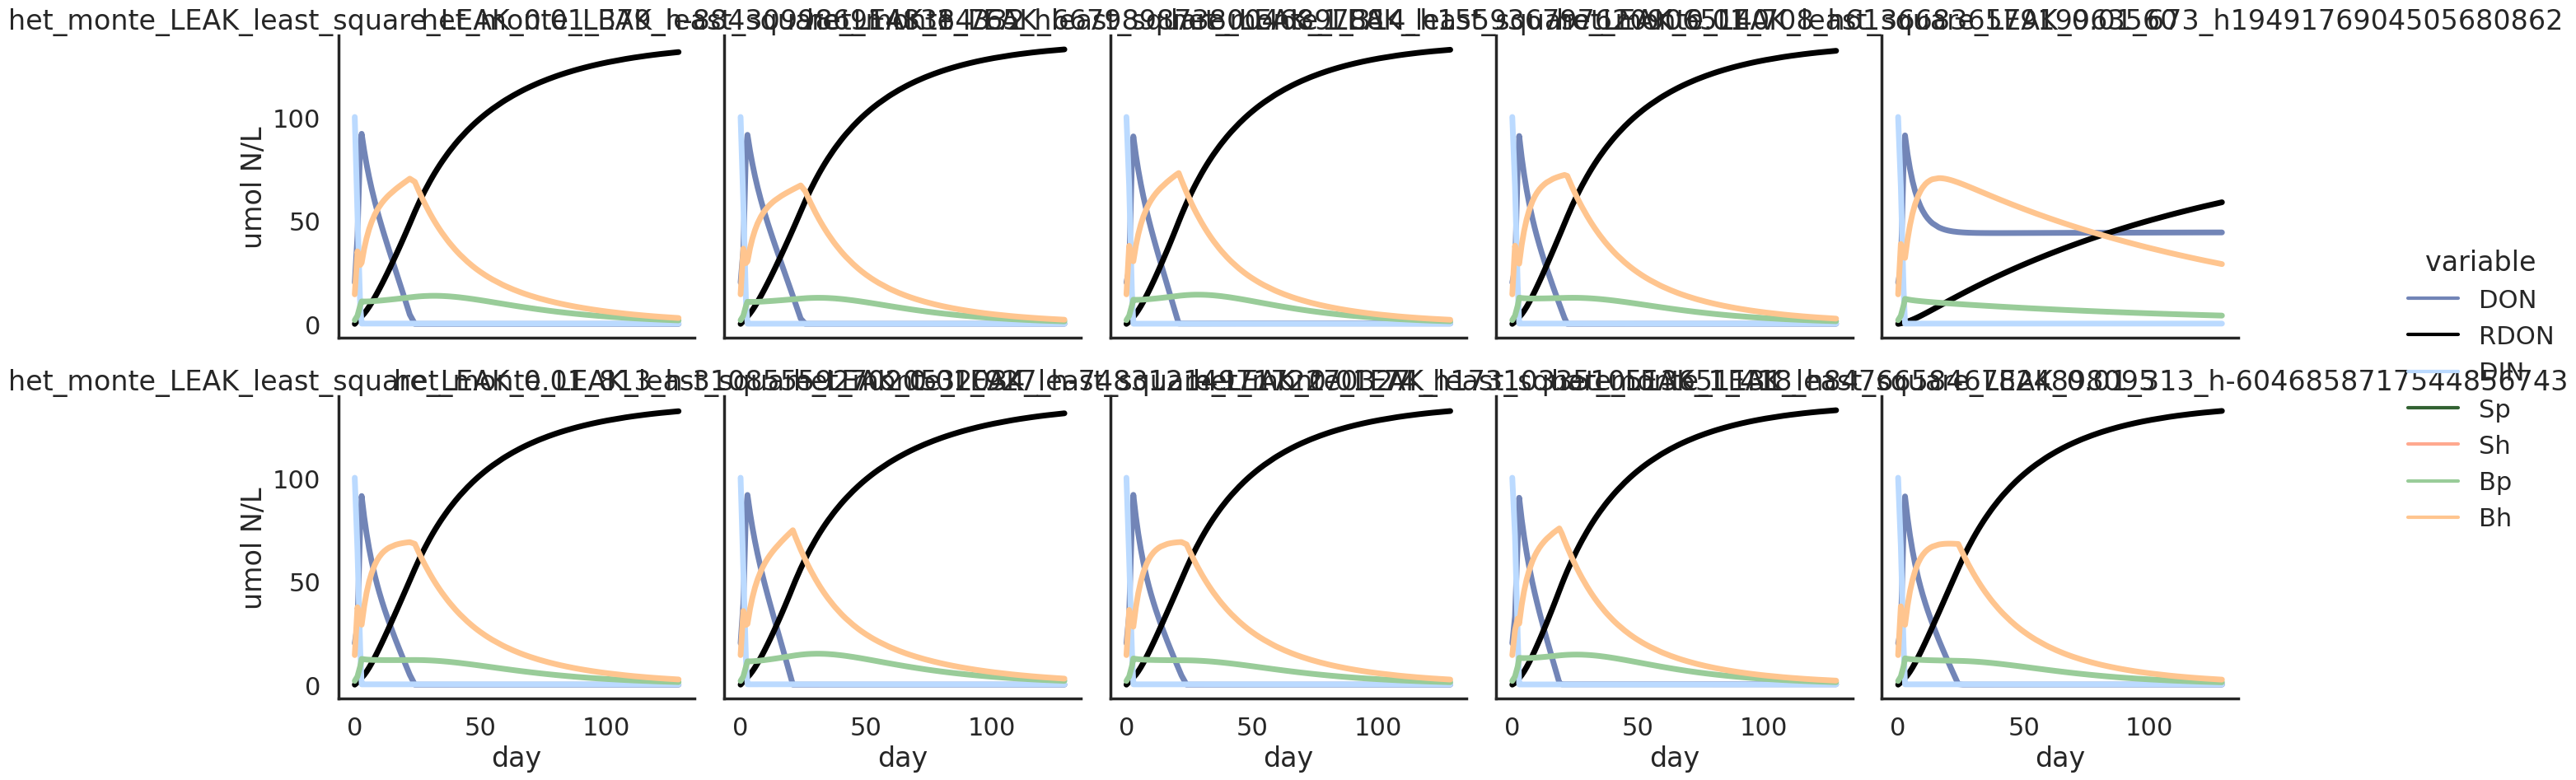

In [102]:
g = sns.relplot(
    data=mdf.loc[mdf.variable.isin(ccnorder) & mdf.run_id.isin(lowest_ids)], 
    x='day', y='value',
    hue='variable', hue_order=ccnorder, palette=ccnpalette,
    #estimator=None, units='run_id',
    col='run_id', col_order=lowest_ids, col_wrap=5,
    kind='line', lw=5,
)


def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='ref_Bp', ax=ax, s=100, legend=False, color=PCOLOR)
    #sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)

#g.map(pp)
g.set(ylabel='umol N/L')
g.set_titles(col_template='{col_name}',)



In [103]:
lowest_ids


42024    het_monte_LEAK_least_square_LEAK_0.01_379_h-88...
46493    het_monte_LEAK_least_square_LEAK_1_765_h667989...
45995    het_monte_LEAK_least_square_LEAK_1_314_h155936...
42384    het_monte_LEAK_least_square_LEAK_0.01_708_h613...
42345    het_monte_LEAK_least_square_LEAK_0.01_673_h194...
42496    het_monte_LEAK_least_square_LEAK_0.01_813_h-31...
42616    het_monte_LEAK_least_square_LEAK_0.01_927_h-74...
42429    het_monte_LEAK_least_square_LEAK_0.01_74_h1731...
46110    het_monte_LEAK_least_square_LEAK_1_418_h847665...
41952    het_monte_LEAK_least_square_LEAK_0.01_313_h-60...
Name: run_id, dtype: object

In [104]:
import hdbscan


In [105]:
import umap

In [106]:
sample_cols_umap = ['Bp', 'Bh', 'DON', 'DIN', 'DOC', ]
sample_cols_HDBSCAN = ['Bp', 'Bh',]

sample_days = [ 5, 12, 16, 19, 40, 65]
#sample_days_2 = [ 5, 12, 16, 20, 42, 60]




In [107]:
tdf = mdf.loc[#mdf.day.round(0).isin(sample_days) 
               mdf.variable.isin(sample_cols_umap) 
              #& mdf.run_id.isin(sum_df.run_id)
              #& mdf.run_id.isin(pos_run_ids2)
              #& ~mdf.run_id.isin(neg_ids)
             ]
#tdf['day0'] = tdf.day.round(0)
Xu = tdf.pivot(index='run_id', columns=['variable', 'day'], values=['value'])

In [108]:
Xu

value             \
variable                                                   Bp              
day                                                0.000000   1.081944     
run_id                                                                     
het_least_square_MIN_least_square_MIN_0.01_10_1...   1.785714   5.354754   
het_least_square_MIN_least_square_MIN_0.01_10_1...   1.785714   5.354183   
het_least_square_MIN_least_square_MIN_0.01_10_1...   1.785714   5.350824   
het_least_square_MIN_least_square_MIN_0.01_10_1...   1.785714   5.354491   
het_least_square_MIN_least_square_MIN_0.01_10_1...   1.785714   5.377371   
...                                                       ...        ...   
vhet_het_least_square_MIN_least_square_MIN_20_2_1    1.785714   4.021254   
vhet_het_least_square_MIN_least_square_MIN_20_4_1    1.785714   4.021260   
vhet_het_least_square_MIN_least_square_MIN_20_5_1    1.785714   4.021255   
vhet_het_least_square_MIN_least_square_MIN_20_7_1    1.785714   4.021260   
vhet_het_least_square_MIN_least_square_MIN_20_9_1    1.785714   4.021259   

                                                                          \
variable                                                                   
day                                                2.164583   2.747222     
run_id                                                                     
het_least_square_MIN_least_square_MIN_0.01_10_1...  15.435965  14.835408   
het_least_square_MIN_least_square_MIN_0.01_10_1...  15.448244  14.925739   
het_least_square_MIN_least_square_MIN_0.01_10_1...  15.497051  15.145820   
het_least_square_MIN_least_square_MIN_0.01_10_1...  15.466153  15.070001   
het_least_square_MIN_least_square_MIN_0.01_10_1...  16.108192  28.896157   
...                                                       ...        ...   
vhet_het_least_square_MIN_least_square_MIN_20_2_1    9.060183  14.027738   
vhet_het_least_square_MIN_least_square_MIN_20_4_1    9.060215  11.436682   
vhet_het_least_square_MIN_least_square_MIN_20_5_1    9.060194  14.027760   
vhet_het_least_square_MIN_least_square_MIN_20_7_1    9.060216  14.027797   
vhet_het_least_square_MIN_least_square_MIN_20_9_1    9.060205  14.027767   

                                                                          \
variable                                                                   
day                                                3.754167   4.701389     
run_id                                                                     
het_least_square_MIN_least_square_MIN_0.01_10_1...  11.505852   9.126518   
het_least_square_MIN_least_square_MIN_0.01_10_1...  11.521037   9.099952   
het_least_square_MIN_least_square_MIN_0.01_10_1...  10.949118   8.115460   
het_least_square_MIN_least_square_MIN_0.01_10_1...  11.640871   9.199080   
het_least_square_MIN_least_square_MIN_0.01_10_1...  35.762106  24.841303   
...                                                       ...        ...   
vhet_het_least_square_MIN_least_square_MIN_20_2_1   29.860158  57.082435   
vhet_het_least_square_MIN_least_square_MIN_20_4_1    9.961752   8.454981   
vhet_het_least_square_MIN_least_square_MIN_20_5_1   29.860212  40.800166   
vhet_het_least_square_MIN_least_square_MIN_20_7_1   16.433834  16.780398   
vhet_het_least_square_MIN_least_square_MIN_20_9_1   21.137923  19.444152   

                                                                          \
variable                                                                   
day                                                5.720139   6.731944     
run_id                                                                     
het_least_square_MIN_least_square_MIN_0.01_10_1...   7.167728   5.674679   
het_least_square_MIN_least_square_MIN_0.01_10_1...   7.117688   5.616013   
het_least_square_MIN_least_square_MIN_0.01_10_1...   5.920253   4.359073   
het_least_square_MIN_least_square_MIN_0.01_10_1...   7.197497   5.679836   
het_least_square_MIN_leas

In [ ]:
reducer = umap.UMAP(random_state=1234)
umap_embedding = reducer.fit_transform(Xu)

/home/oweissberg/work/tools/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:274: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


In [ ]:
udf = pd.DataFrame(data=umap_embedding, columns=['UMAP1','UMAP2'])

In [ ]:
udf['run_id'] = Xu.index

In [ ]:
udf = pd.merge(udf, min_mse_df, on='run_id', how='left')

In [ ]:
sns.set_context('paper')

In [ ]:

import umap.plot
umap.plot.points(reducer, labels=udf['Group'], theme='fire')
#plt.legend(False)

In [ ]:
umap.plot.diagnostic(reducer, diagnostic_type='pca')

In [ ]:
clusterer = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    cluster_selection_epsilon = 10.0,
    #cluster_selection_method='leaf'
)
clusterer.fit(Xu)


In [ ]:
clusterer.labels_

In [ ]:
clusterer.labels_.max()

In [ ]:
(clusterer.labels_ < 0).sum()

In [ ]:
np.unique(clusterer.labels_, return_counts=True)

In [ ]:
udf.shape

In [ ]:
udf['cluster'] = clusterer.labels_

In [ ]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster'], theme='viridis')

In [135]:
clusterer2 = hdbscan.HDBSCAN(
    min_cluster_size=500, 
    min_samples=5, 
    core_dist_n_jobs=1, 
    #cluster_selection_epsilon = 10,
    #cluster_selection_method='leaf'
)
clusterer2.fit(Xu.loc[Xu.index.isin(udf.loc[udf.cluster==-1, 'run_id'])])


HDBSCAN(core_dist_n_jobs=1, min_cluster_size=500, min_samples=5)

In [136]:
clusterer2.labels_.max()

2

In [137]:
(clusterer2.labels_ < 0).sum()

6304

In [138]:
np.unique(clusterer2.labels_, return_counts=True)

(array([-1,  0,  1,  2], dtype=int64),
 array([ 6304,  1117,  1346, 12383], dtype=int64))

In [139]:
udf['cluster2'] = udf['cluster']
udf.loc[udf.cluster==-1, 'cluster2'] = clusterer2.labels_ + udf['cluster'].max() + 2

<AxesSubplot:>

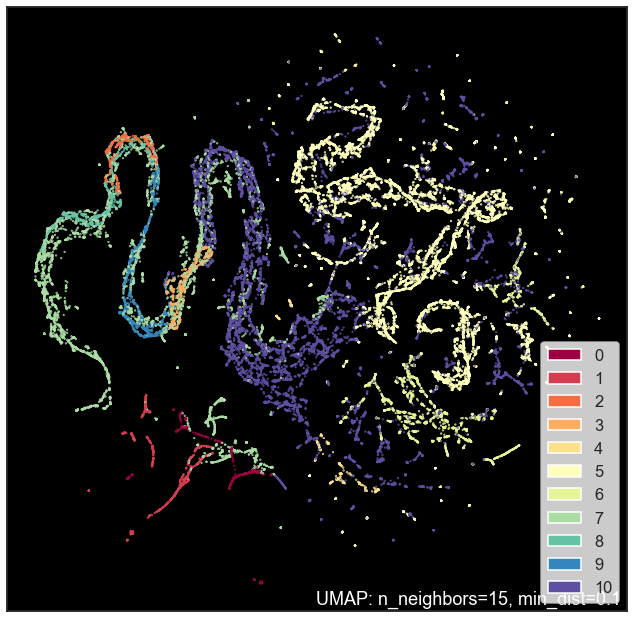

In [140]:
import umap.plot
umap.plot.points(reducer, labels=udf['cluster2'], theme='viridis')

<AxesSubplot:>

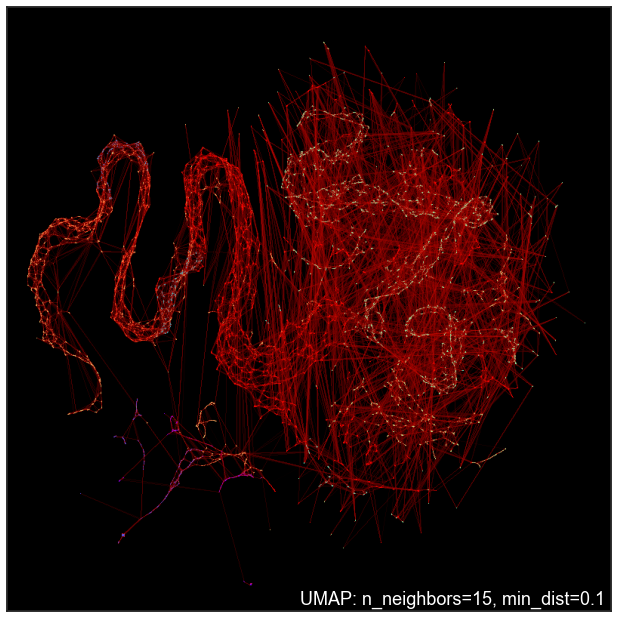

In [141]:
umap.plot.connectivity(reducer, show_points=True, theme='fire',
                       labels=udf['cluster2'],#edge_bundling='hammer'
                      )

In [142]:
udf.groupby('cluster2')['error'].describe()

count         mean          std          min          25%  \
cluster2                                                                
0           693.0   841.930649   518.647162   501.773845   653.613787   
1          1146.0  1498.751477   379.965202   947.275939  1356.432265   
2           618.0  5630.541342    21.690429  5569.351890  5617.155243   
3           790.0  5622.834792    29.675339  5527.631479  5603.771648   
4           655.0  5643.094059    10.338384  5576.706444  5637.505221   
5         14264.0  5611.181925    35.183663  5274.248095  5597.877024   
6          4025.0  5625.791541    40.484439  4811.855501  5617.946179   
7          6304.0  5229.248991  1064.292912   494.492079  5536.971668   
8          1117.0  5631.013072    39.827876  5564.760985  5604.417054   
9          1346.0  5622.046554    29.713415  5438.507308  5604.268652   
10        12383.0  5609.577323   123.271788  3311.249678  5602.342892   

                  50%          75%          max  
cluster2                                         
0          653.795689   667.992538  4235.589708  
1         1357.147261  1370.803895  3366.605169  
2         5628.781854  5647.822144  5721.775649  
3         5617.861472  5632.645770  5820.467229  
4         5645.589552  5648.676444  5673.513786  
5         5607.267714  5623.179011  5929.336771  
6         5631.418739  5641.307188  5745.822399  
7         5597.203443  5622.314324  6017.070345  
8         5628.702172  5647.763169  5894.553386  
9         5615.406415  5632.609768  5885.034092  
10        5623.190405  5647.079903  5930.400788

In [143]:
udf.groupby(['type', 'cluster'])['run_id'].count()

type  cluster
de3   -1            33
       2             1
       3             1
       5            18
       6             2
de4   -1            74
       4            14
       5             3
       6            61
dm    -1            35
       1            32
dm2   -1            22
       0            38
       1             7
pse3  -1           272
       0            59
       1           544
       6            56
pse4  -1           312
       0            42
       1           536
       6            78
pse5  -1           305
       0           554
       1            27
       6            79
se3   -1         16584
       2           616
       3           788
       5         14092
       6          1541
se4   -1          3513
       2             1
       3             1
       4           641
       5           151
       6          2208
Name: run_id, dtype: int64

In [144]:
udf.groupby(['type', 'cluster2'])['run_id'].count()

type  cluster2
de3   2               1
      3               1
      5              18
      6               2
      7              10
      8               3
      10             20
de4   4              14
      5               3
      6              61
      7               7
      10             67
dm    1              32
      7              35
dm2   0              38
      1               7
      7              21
      10              1
pse3  0              59
      1             544
      6              56
      7             247
      10             25
pse4  0              42
      1             536
      6              78
      7             286
      10             26
pse5  0             554
      1              27
      6              79
      7             278
      10             27
se3   2             616
      3             788
      5           14092
      6            1541
      7            5041
      8            1111
      9            1321
      10           9111
s

In [145]:
sorted(udf.cluster2.unique())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [146]:
udf.columns

Index(['UMAP1', 'UMAP2', 'run_id', 'Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p',
       'gamma^D_h', 'R_p', 'R_h', 'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p',
       'K^IN_p', 'K^OC_p', 'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h',
       'Vmax^ON_p', 'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h',
       'Vmax^IN_h', 'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax',
       'KT_h', 'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h',
       'tau', 'r0_p', 'r0_h', 'b_p', 'b_h', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'max_nonzero_day', 'negative',
       'zero', 'cluster', 'cluster2'],
      dtype='object')

In [147]:
sum_df.columns

Index(['Unnamed: 0', 'M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 'R_p', 'R_h',
       'E^O_p', 'E^I_p', 'E^O_h', 'E^I_h', 'K^ON_p', 'K^IN_p', 'K^OC_p',
       'K^IC_p', 'K^ON_h', 'K^IN_h', 'K^OC_h', 'K^IC_h', 'Vmax^ON_p',
       'Vmax^IN_p', 'Vmax^OC_p', 'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h', 'Vmax^IC_h', 'O_p', 'O_h', 'epsilon', 'VTmax', 'KT_h',
       'omega', 'K^S_p', 'K^S_h', 'E^S_p', 'E^S_h', 'M^S_p', 'M^S_h', 'tau',
       'r0_p', 'r0_h', 'b_p', 'b_h', 'run_id', 'status', 'h_err', 'p_err',
       'error', 'logerror', 'message', 'type', 'max_nonzero_day', 'negative',
       'zero'],
      dtype='object')

In [148]:
sum_df2 = pd.merge(sum_df, udf[['run_id', 'cluster', 'cluster2', 'UMAP1', 'UMAP2', ]],
                  on='run_id', how='left')
sum_df2
#    & mdf.run_id.isin(pos_run_ids)
#              & ~mdf.run_id.isin(neg_ids)
#udf = pd.merge(udf, sum_df, on='run_id', how='left')

Unnamed: 0           M_h           M_p  gamma^D_p  gamma^D_h    R_p  \
0                0  4.502398e-06  3.996791e-06   0.365975   0.070244  6.625   
1                0  4.001982e-06  7.086781e-06   0.040492   0.911524  6.625   
2                0  5.660195e-06  1.106181e-05   0.701770   0.569487  6.625   
3                0  7.570845e-06  9.444341e-06   0.079173   0.384086  6.625   
4                0  6.165933e-07  1.176978e-08   0.201885   0.221401  6.625   
...            ...           ...           ...        ...        ...    ...   
112465           0  9.805185e-06  9.805185e-06   0.133301   0.297363  6.625   
112466           0  1.117282e-05  1.881917e-06   0.286621   0.175293  6.625   
112467           0  1.412851e-07  2.548783e-06   0.916504   0.455566  6.625   
112468           0  3.724275e-06  1.520228e-06   0.204590   0.202637  6.625   
112469           0  8.335820e-06  3.238254e-06   0.149902   0.257324  6.625   

          R_h     E^O_p         E^I_p         E^O_h  ...  logerror  message  \
0       6.625  0.000009  1.013520e-05  2.476267e-07  ...  8.631307      NaN   
1       6.625  0.000003  1.028460e-06  6.359510e-06  ...  8.619667      NaN   
2       6.625  0.000004  7.134792e-06  9.880638e-07  ...  8.618590      NaN   
3       6.625  0.000007  1.361663e-06  7.726777e-06  ...  8.635134      NaN   
4       6.625  0.000008  5.495765e-06  4.297097e-06  ...  8.634655      NaN   
...       ...       ...           ...           ...  ...       ...      ...   
112465  6.625  0.000004  2.543132e-08  3.067017e-06  ...  8.643458      NaN   
112466  6.625  0.000008  7.217407e-06  4.196167e-06  ...  8.635669      NaN   
112467  6.625  0.000004  7.817586e-06  6.098429e-06  ...  8.642730      NaN   
112468  6.625  0.000006  5.050659e-06  4.745483e-06  ...  8.643537      NaN   
112469  6.625  0.000002  3.341675e-06  5.152384e-06  ...  8.637539      NaN   

        type  max_nonzero_day  negative   zero  cluster  cluster2     UMAP1  \
0        de3         8.779167     False  False      5.0       5.0  8.551019   
1        de3        25.720139     False  False      5.0       5.0  9.525745   
2        de3        22.753472     False  False     -1.0       7.0  0.573815   
3        de3         8.779167     False  False     -1.0       7.0 -1.609419   
4        de3         8.779167     False  False     -1.0      10.0  3.171893   
...      ...              ...       ...    ...      ...       ...       ...   
112465   se4         1.820833     False   True      NaN       NaN       NaN   
112466   se4         4.832639      True   True      NaN       NaN       NaN   
112467   se4         1.820833     False   True      NaN       NaN       NaN   
112468   se4         1.820833     False   True      NaN       NaN       NaN   
112469   se4         4.832639      True   True      NaN       NaN       NaN   

            UMAP2  
0       14.969038  
1       11.655981  
2       11.419992  
3        9.430687  
4        3.971223  
...           ...  
112465        NaN  
112466        NaN  
112467        NaN  
112468        NaN  
112469        NaN  

[112470 rows x 59 columns]

In [149]:
sum_df2.loc[sum_df2.zero, 'cluster2'] = 'zero'
sum_df2.loc[sum_df2.negative, 'cluster2'] = 'negative'


In [150]:
sum_df2.groupby(['cluster2', 'type' ]).run_id.count()

cluster2  type
0.0       dm2        38
          pse3       59
          pse4       42
          pse5      554
1.0       dm         32
                  ...  
negative  se4      7517
zero      de3        10
          de4       862
          se3      7013
          se4     52705
Name: run_id, Length: 61, dtype: int64

5.0


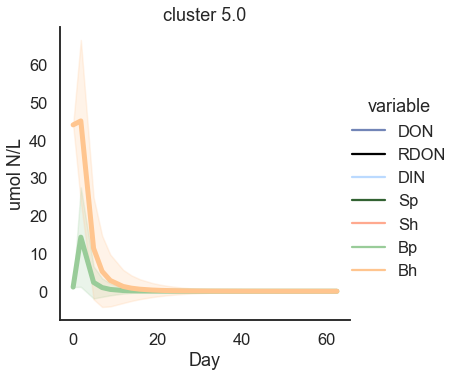

7.0


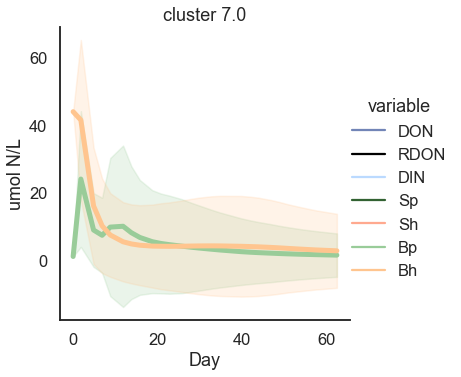

10.0


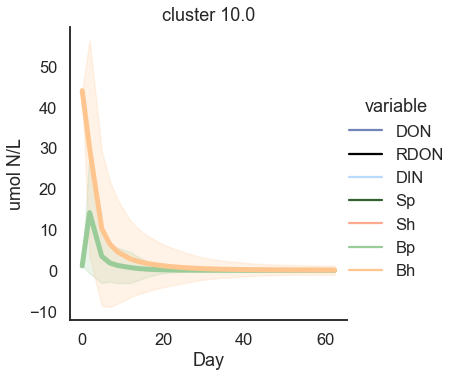

3.0


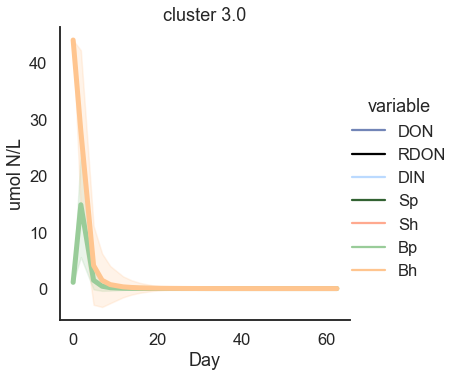

zero


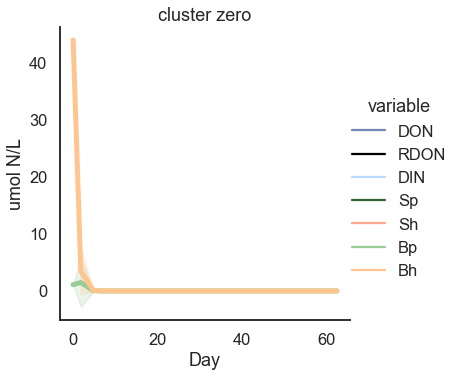

2.0


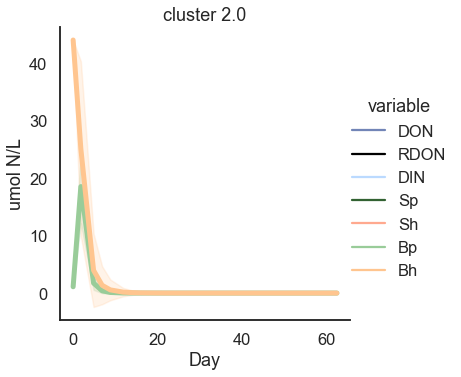

6.0


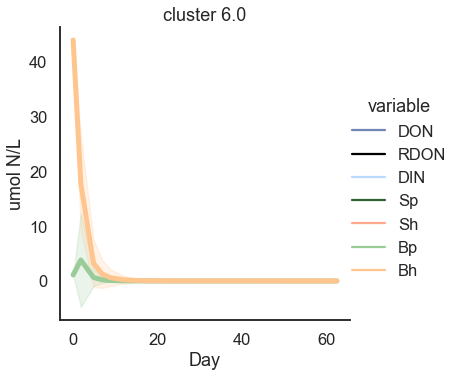

negative


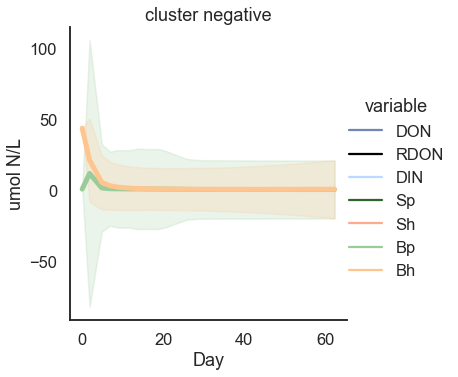

8.0


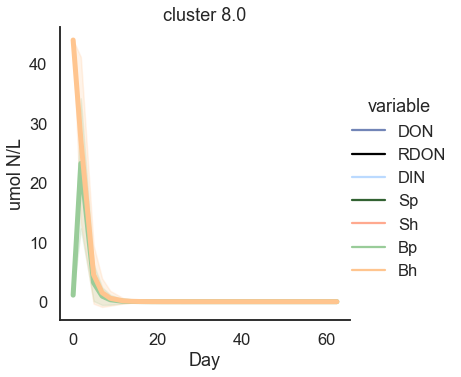

4.0


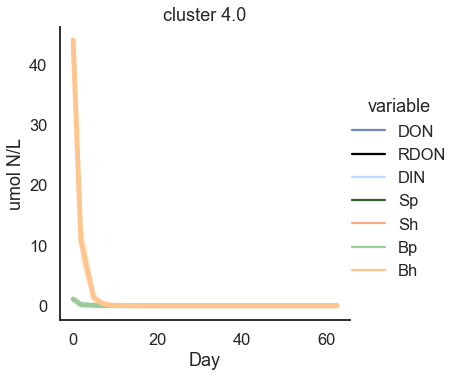

0.0


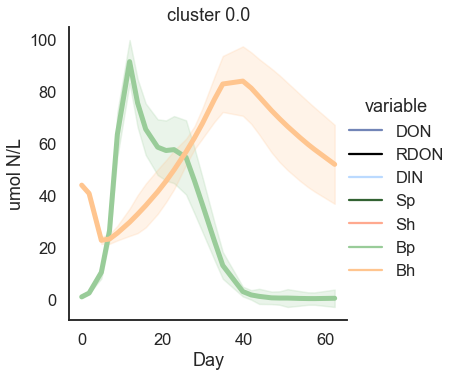

1.0


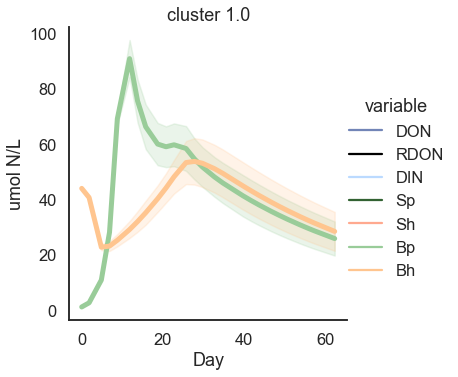

9.0


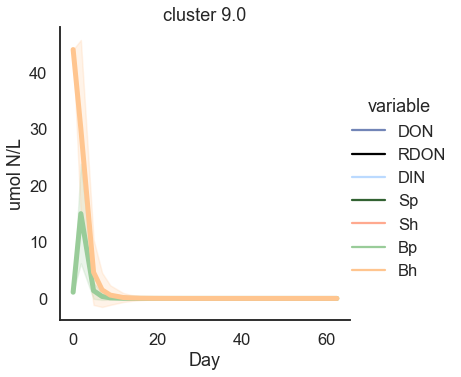

In [151]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in (sum_df2.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(sum_df2.loc[sum_df2.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(['Bp', 'Bh']) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


0


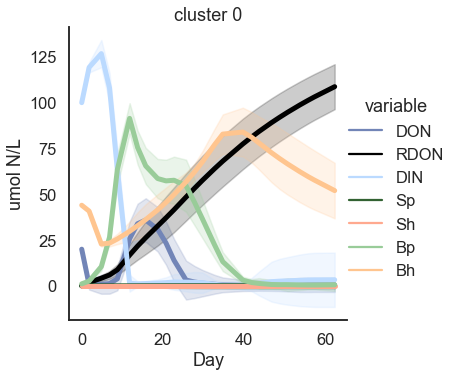

1


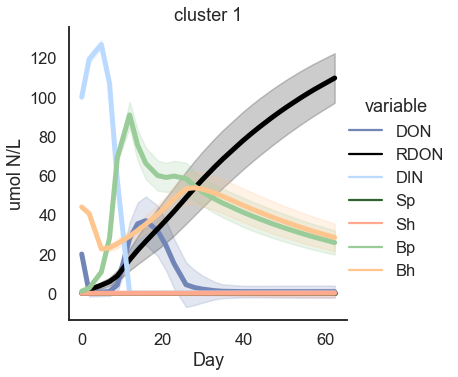

2


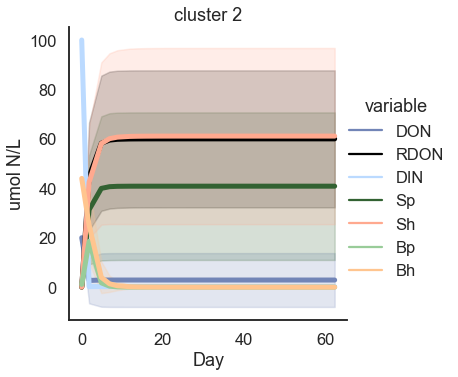

3


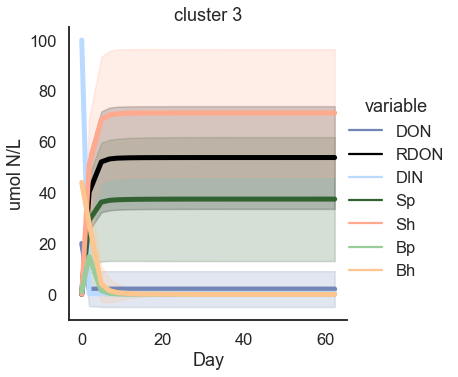

4


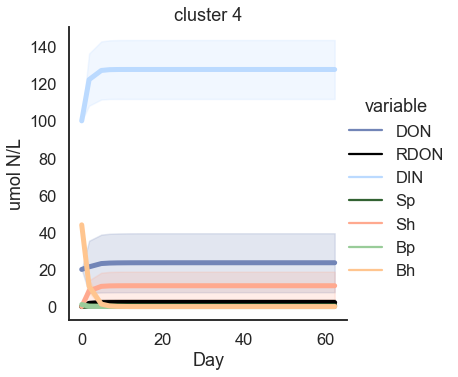

5


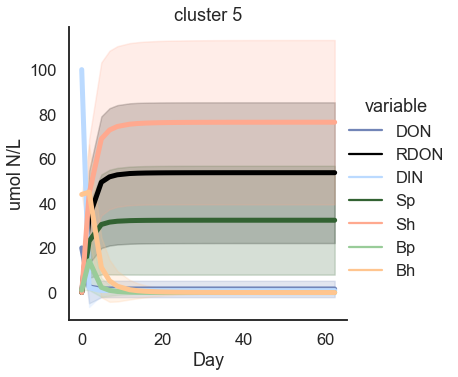

6


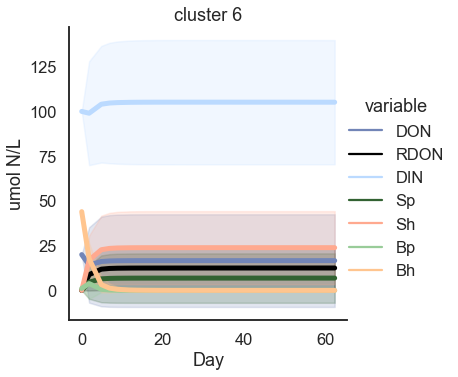

7


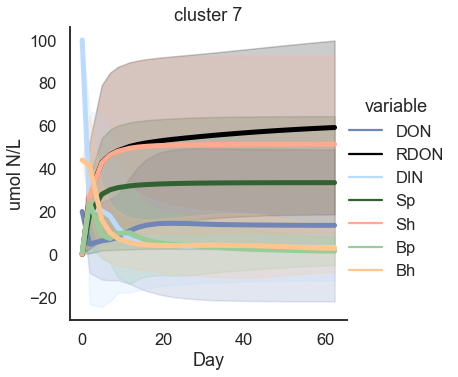

8


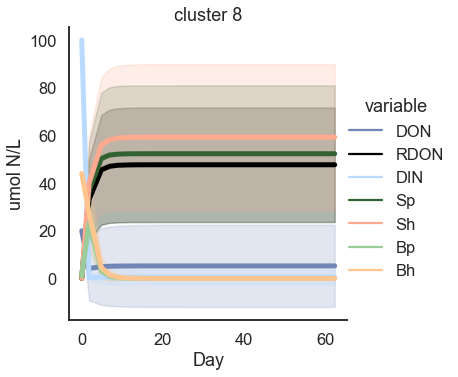

9


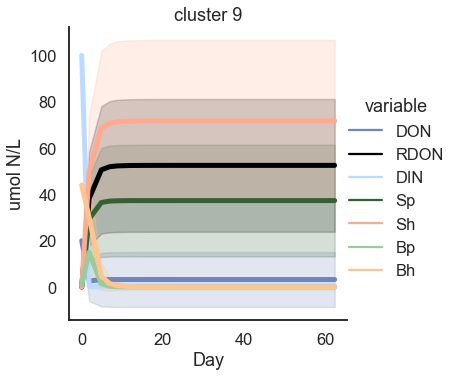

10


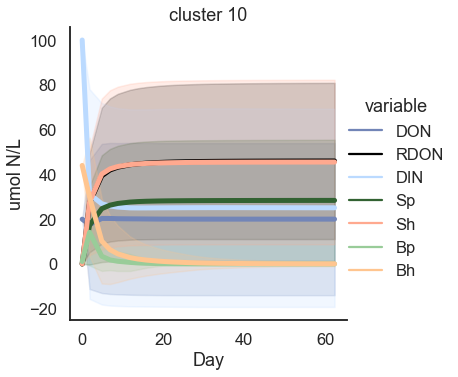

In [152]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    print(i)
    #ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


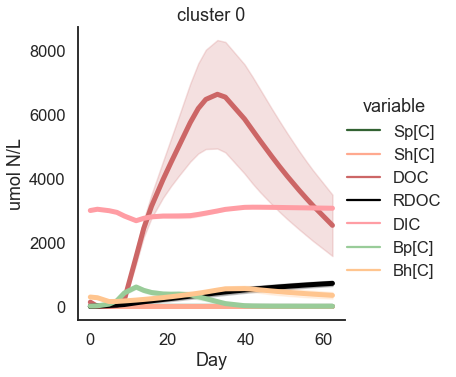

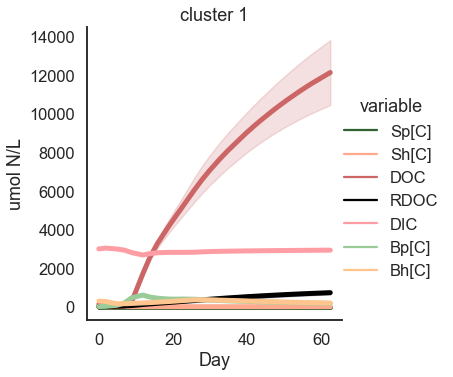

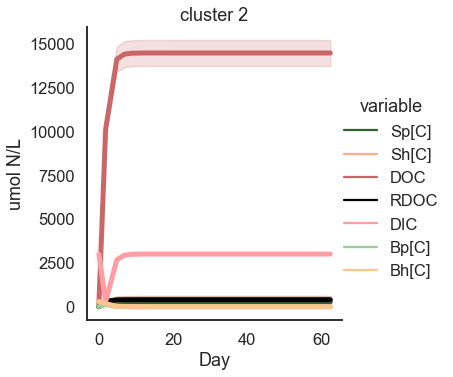

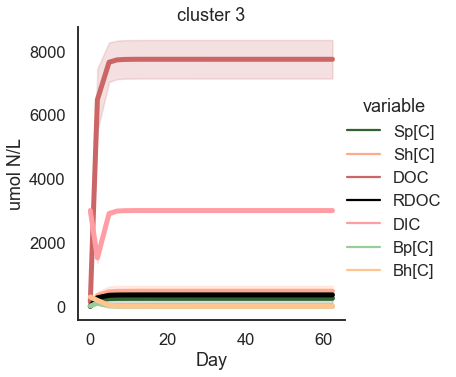

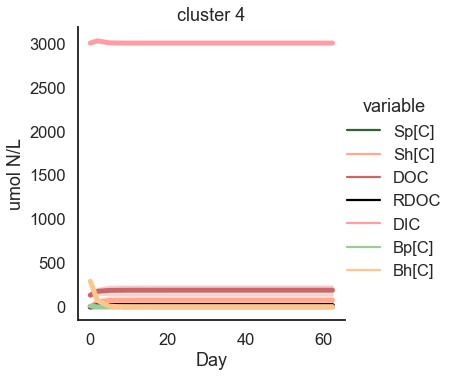

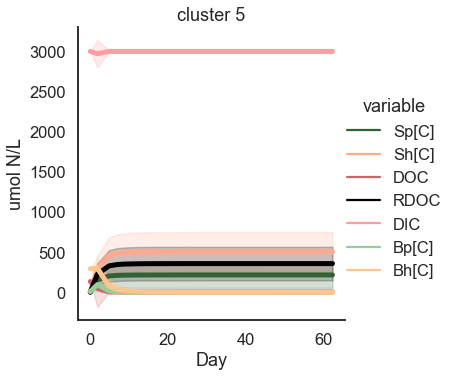

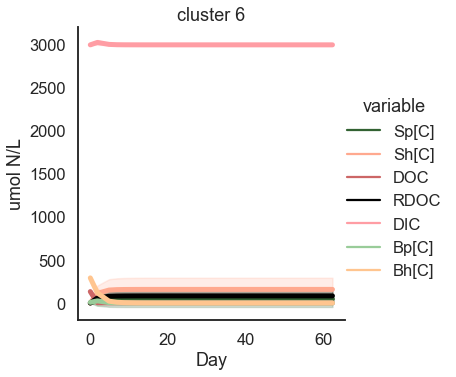

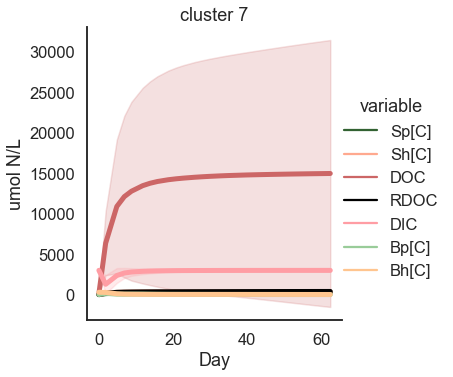

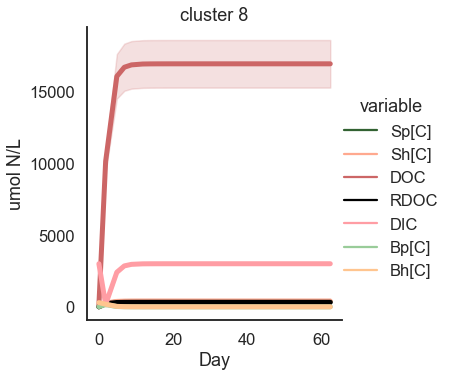

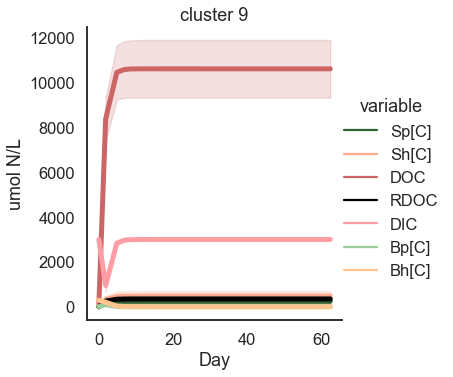

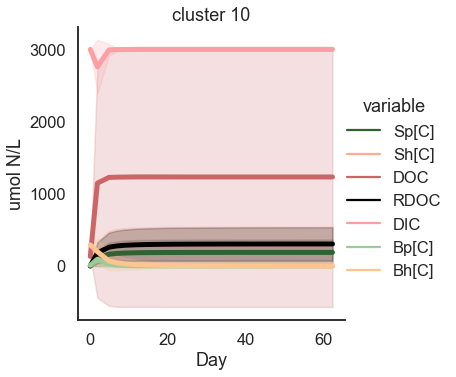

In [153]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    #ids = list(udf.loc[udf.cluster==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    #tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
#     g = sns.relplot(
#         data=tdf, 
#         x='Day', y='value',
#         hue='variable', hue_order=ccnorder, palette=ccnpalette,
#         estimator=None, units='run_id',
#         #col='run_id', col_order=ids, col_wrap=5,
#         kind='line', lw=0.5,
#         aspect=1.5, legend=False,
#     )
    g = sns.relplot(data=atdf,
        x='Day', y='value',
                    kind='line',
        hue='variable', hue_order=cccorder, palette=cccpalette, #legend=False, 
                     lw=5,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    #g.set_titles(col_template='{col_name}',)
    plt.show()


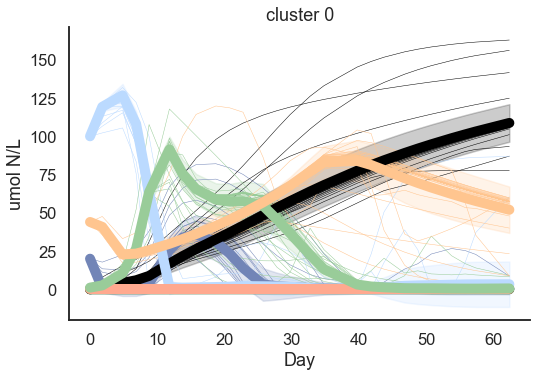

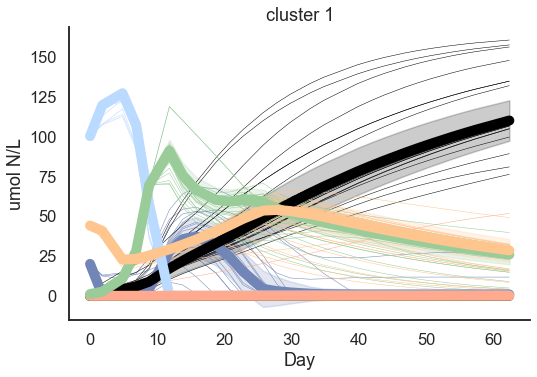

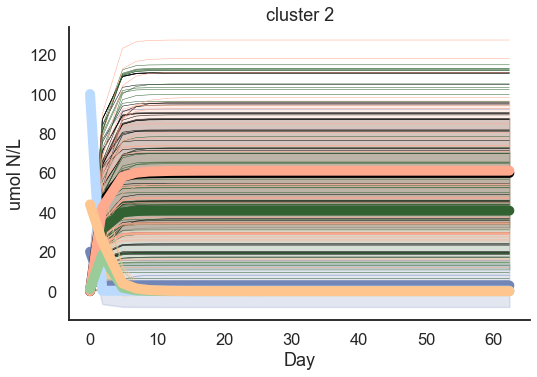

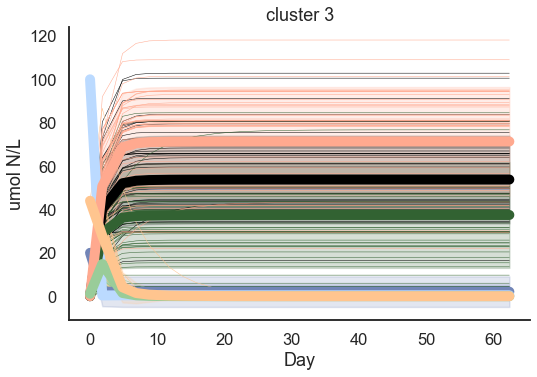

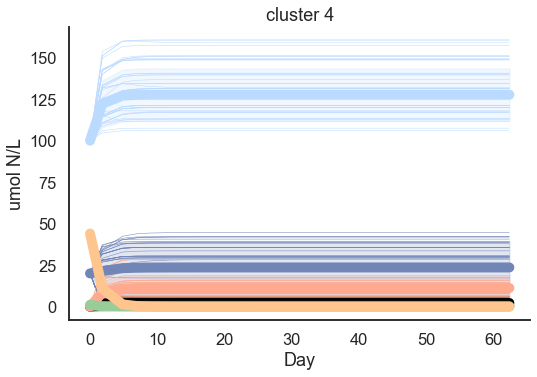

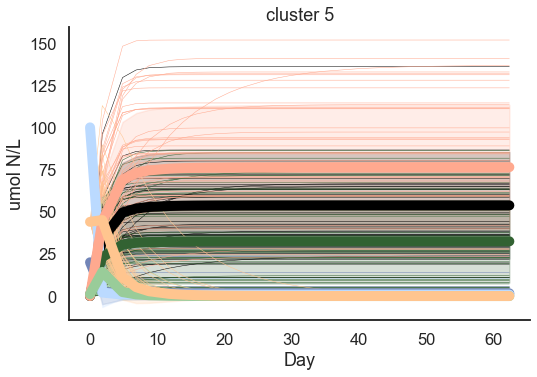

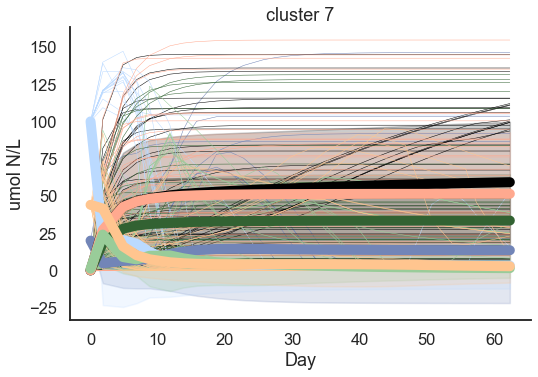

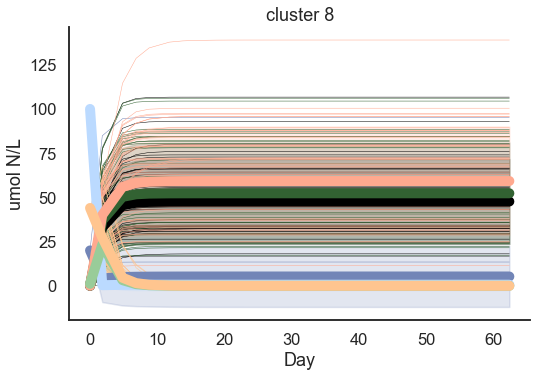

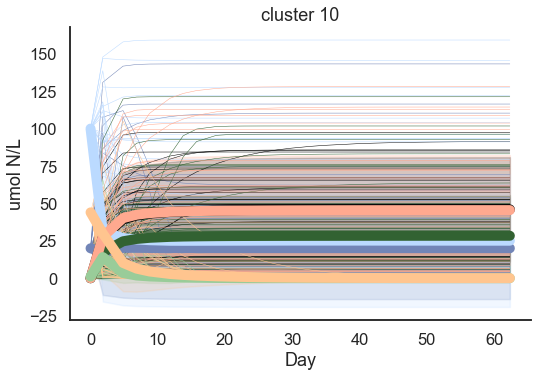

In [154]:
mdf2 = df.melt(id_vars=['run_id', 'day', 't'], value_vars=ccnorder+cccorder)                            
mdf2['Day'] =mdf2['day'].round(5)
                            
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[N]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[N]', ax=ax, s=100, legend=False, color=HCOLOR)


for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(ccnorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=ccnorder, palette=ccnpalette, legend=False, lw=10,ci='sd',
                 #ls='--',
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol N/L', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


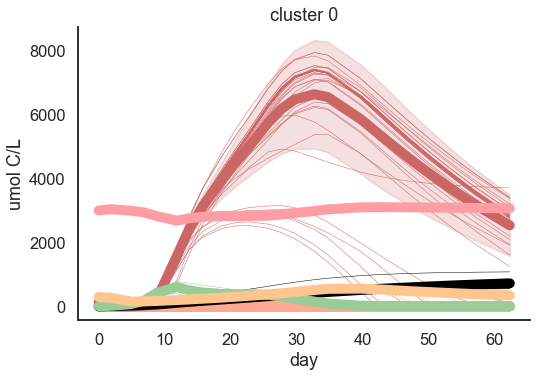

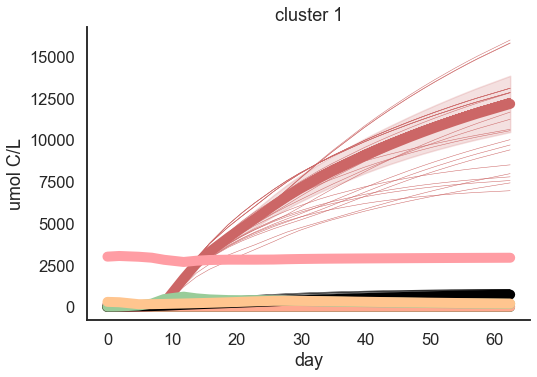

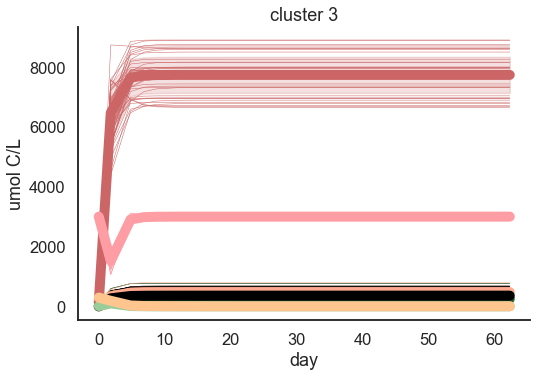

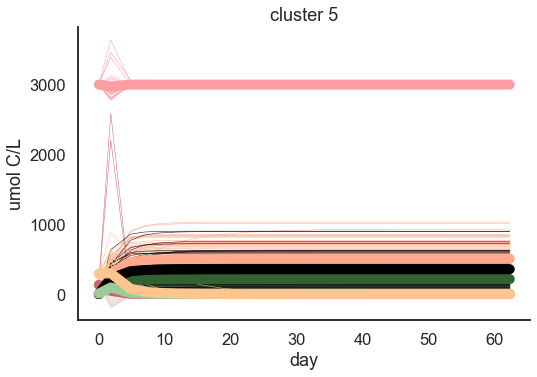

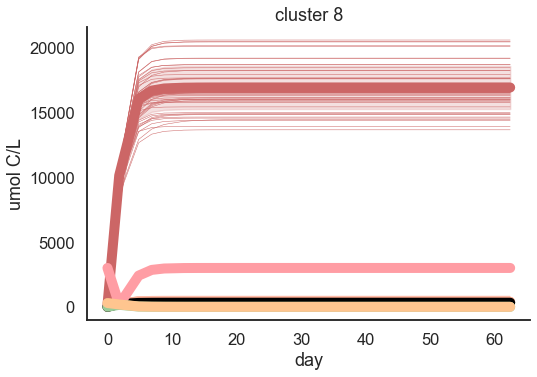

In [155]:
def pp(**kwargs):
    
    # get a reference to the currently active axes
    ax = plt.gca()    
    sns.scatterplot(data=refdf, x='day', y='cc Bp[C]', ax=ax, s=100, legend=False, color=PCOLOR)
    sns.scatterplot(data=refdf, x='day', y='cc Bh[C]', ax=ax, s=100, legend=False, color=HCOLOR)




for i in sorted(udf.cluster2.unique()):
    ids = list(udf.loc[udf.cluster2==i, 'run_id'].sample(50))
    all_ids = list(udf.loc[udf.cluster2==i, 'run_id'])
    tdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(ids)]
    atdf = mdf2.loc[mdf2.variable.isin(cccorder) & mdf2.run_id.isin(all_ids)]
    g = sns.relplot(
        data=tdf, 
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette,
        estimator=None, units='run_id',
        #col='run_id', col_order=ids, col_wrap=5,
        kind='line', lw=0.5,
        aspect=1.5, legend=False,
    )
    sns.lineplot(data=atdf,
        x='Day', y='value',
        hue='variable', hue_order=cccorder, palette=cccpalette, legend=False, lw=10, ci='sd'
    )


    #g.map(pp)
    #g.map_dataframe(pp2)

    g.set(ylabel='umol C/L', xlabel='day', title=f'cluster {i}')
    g.set_titles(col_template='{col_name}',)


In [156]:
udf.head()

UMAP1      UMAP2                     run_id  Unnamed: 0           M_h  \
0  -4.203127  17.046898  de3_h-1073436347008145156           0  6.542767e-07   
1  -8.958201  12.223330  de3_h-1659825646723300236           0  9.715511e-06   
2  20.315327   9.566874  de3_h-1765083009615901515           0  1.008276e-05   
3  -4.633354  15.106026  de3_h-2171644033102072858           0  1.143038e-05   
4   3.143292   4.256141  de3_h-3012145983443439829           0  1.106115e-05   

        M_p  gamma^D_p  gamma^D_h    R_p    R_h  ...        p_err  \
0  0.000011   0.298158   0.229257  6.625  6.625  ...  1603.049991   
1  0.000002   0.620677   0.419616  6.625  6.625  ...  1606.113574   
2  0.000004   0.631468   0.491229  6.625  6.625  ...  1604.830136   
3  0.000010   0.842866   0.587069  6.625  6.625  ...  1604.574999   
4  0.000002   0.955503   0.805939  6.625  6.625  ...  1643.328802   

         error  logerror  message  type  max_nonzero_day  negative   zero  \
0  5589.574743  8.628658      NaN   de3        11.803472     False  False   
1  5612.515391  8.632754      NaN   de3         8.779167     False  False   
2  5634.977794  8.636748      NaN   de3         6.853472     False  False   
3  5594.669588  8.629570      NaN   de3        11.803472     False  False   
4  5651.208692  8.639625      NaN   de3        11.803472     False  False   

   cluster  cluster2  
0       -1         8  
1       -1         7  
2        6         6  
3       -1         7  
4       -1        10  

[5 rows x 59 columns]

In [157]:
Xh.columns

MultiIndex([('value', 'Bp',  5.0),
            ('value', 'Bp', 12.0),
            ('value', 'Bp', 16.0),
            ('value', 'Bp', 19.0),
            ('value', 'Bp', 42.0),
            ('value', 'Bp', 62.0),
            ('value', 'Bh',  5.0),
            ('value', 'Bh', 12.0),
            ('value', 'Bh', 16.0),
            ('value', 'Bh', 19.0),
            ('value', 'Bh', 42.0),
            ('value', 'Bh', 62.0)],
           names=[None, 'variable', 'day0'])

In [ ]:
udf['Bp@42'] = udf['run_id'].map(Xh[('value', 'Bp', 42.0)])
udf['Bh@42'] = udf['run_id'].map(Xh[('value', 'Bh', 42.0)])


In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=3, kind='ecdf')

In [ ]:

mdf2 = pd.merge(mdf2, udf[['run_id', 'cluster', 'cluster2']], on='run_id', )

In [ ]:

sns.displot(data=mdf2.loc[mdf2.Day.round(0).isin(sample_days) & mdf2.variable.isin(['Bp', 'Bh'])], 
            x='value', col='Day', palette='Set2', row='variable',
            aspect=1,
            kind='ecdf', hue='cluster2'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='Bp@42', hue='cluster', palette='Set2', 
            aspect=1,
            kind='ecdf', col='cluster'
           )

In [ ]:
sns.displot(data=udf, #.loc[udf.cluster2>=0], 
            x='error', hue='cluster2', palette='fire', 
            aspect=3, kind='ecdf')

In [ ]:
cols_to_lookat = ['M_h', 'M_p', 'gamma^D_p', 'gamma^D_h', 
       'E^O_p', 'E^I_h', 
       'Vmax^IN_p',  'Vmax^IC_p', 'Vmax^ON_h', 'Vmax^IN_h',
       'Vmax^OC_h',  'epsilon', 'VTmax', 'omega']

In [ ]:
for c in cols_to_lookat:
    sns.displot(data=udf.loc[udf.cluster>=0], 
                x=c, hue='cluster', palette=cpalette[1:], kind='hist', element='step', multiple='stack', col='cluster' )

In [ ]:
sns.set_context('talk')
cpalette=[(0.9,0.9,0.9),] +sns.color_palette('deep', clusterer.labels_.max()+1)

sns.relplot(data=udf, x='UMAP1', y='UMAP2', hue='cluster', s=5, 
            height=10, aspect=1, palette=cpalette, #size='error',
            legend='full')

In [158]:
sum_df2.to_csv('cluster_assignment.csv.gz')